---
title: GSB - Acitivity 6.1
author: Karissa Mohr
format:
  html:
    embed-resources: true
echo: true
theme: lux
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [14]:
!pip install palmerpenguins

In [15]:
import pandas as pd
from palmerpenguins import load_penguins

In [16]:
penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [17]:
# Suppose we want to predict bill_depth_mm using the other variables in the dataset.
# Which variables would we need to dummify?
penguins.dtypes

,0
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object
year,int64


would dummify the categorical variables, such as: species, island and sex

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [25]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [26]:
# drop missing values/Nan
penguins = penguins.dropna()

In [28]:
# Let's use bill_length_mm to predict bill_depth_mm. Prepare your data and fit the following models on the entire dataset:
# Simple linear regression (e.g. straight-line)
bill_length_linear = LinearRegression()
bill_length_linear.fit(
    X=penguins[["bill_length_mm"]], # Reshape to 2D array
    y=penguins["bill_depth_mm"]
)

LinearRegression()

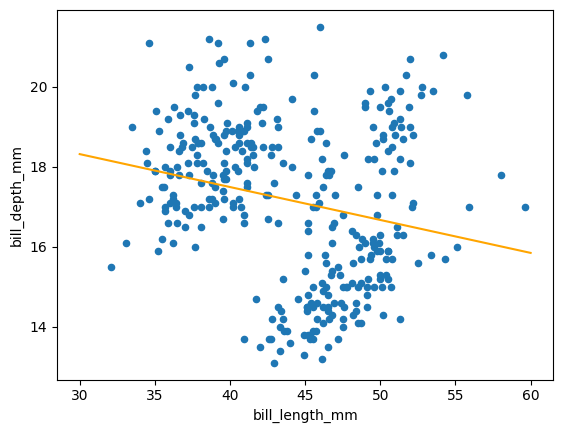

In [32]:
# plot linear regression from model
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(30, 60, num=1000)
y_new_ = pd.Series(
    bill_length_linear.predict(X_new),
    index=X_new["bill_length_mm"]
)

penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c = "orange");

In [33]:
penguins["bill_depth_predict"]= bill_length_linear.predict(penguins[["bill_length_mm"]])
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_depth_predict
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,16.192816
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,17.205435
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,16.703242
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,16.604450


In [41]:
# Quadratic (degree 2 polynomial) model
penguins["bill_depth_square"] = penguins["bill_length_mm"] ** 2
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_depth_predict,bill_depth_square,bill_depth_cubic
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,1528.81,59776.471
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,1560.25,61629.875
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,1624.09,65450.827
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,1346.89,49430.863
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,1544.49,60698.457
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,16.192816,3113.64,173741.112
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,17.205435,1892.25,82312.875
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,16.703242,2460.16,122023.936
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,16.604450,2580.64,131096.512


In [42]:
square_model = LinearRegression()
square_model.fit(
    X=penguins[["bill_length_mm", "bill_depth_square"]],
    y=penguins["bill_depth_mm"]
)

LinearRegression()

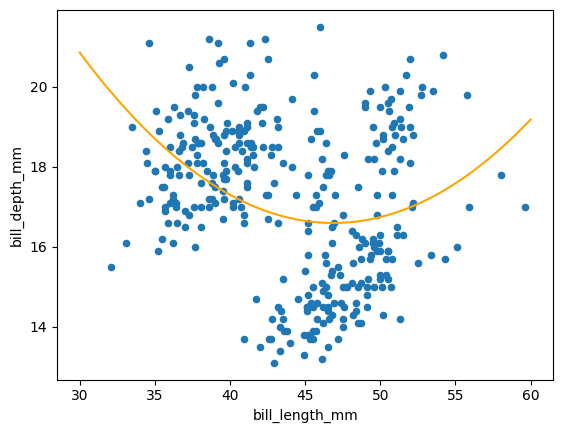

In [43]:
# plot 2 degree model
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(30, 60, num=1000)
X_new["bill_depth_square"] = X_new["bill_length_mm"] ** 2
y_new_ = pd.Series(
    square_model.predict(X_new),
    index=X_new["bill_length_mm"]
)

penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c = "orange");

In [46]:
# Cubic (degree 3 polynomial) model
penguins["bill_depth_cubic"] = penguins["bill_length_mm"] ** 3
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_depth_predict,bill_depth_square,bill_depth_cubic
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,1528.81,59776.471
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,1560.25,61629.875
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,1624.09,65450.827
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,1346.89,49430.863
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,1544.49,60698.457
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,16.192816,3113.64,173741.112
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,17.205435,1892.25,82312.875
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,16.703242,2460.16,122023.936
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,16.604450,2580.64,131096.512


In [53]:
cubic_model = LinearRegression()
cubic_model.fit(
    X=penguins[["bill_length_mm", "bill_depth_cubic"]],
    y=penguins["bill_depth_mm"]
)

LinearRegression()

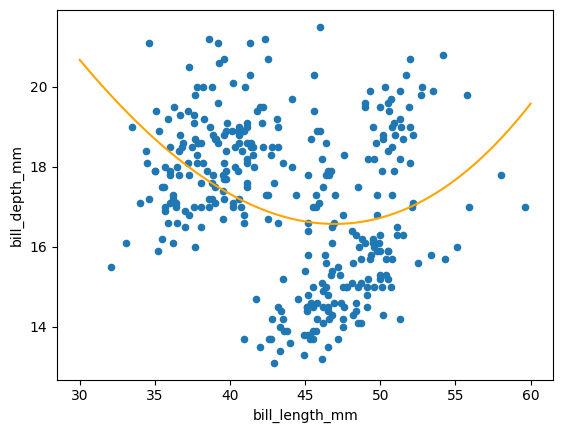

In [54]:
# plot 3 degree model
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(30, 60, num=1000)
X_new["bill_depth_cubic"] = X_new["bill_length_mm"] ** 3
y_new_cubic = pd.Series(
    cubic_model.predict(X_new[["bill_length_mm","bill_depth_cubic"]]),
    index=X_new["bill_length_mm"]
)

penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_cubic.plot.line(c = "orange");

In [56]:
# Degree 10 polynomial model
penguins["bill_depth_10degree"] = penguins["bill_length_mm"] ** 10
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_depth_predict,bill_depth_square,bill_depth_cubic,bill_depth_degree,bill_depth_10degree
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,1528.81,59776.471,8.351559e+15,8.351559e+15
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,1560.25,61629.875,9.246363e+15,9.246363e+15
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,1624.09,65450.827,1.129927e+16,1.129927e+16
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,1346.89,49430.863,4.432621e+15,4.432621e+15
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,1544.49,60698.457,8.788717e+15,8.788717e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,16.192816,3113.64,173741.112,2.926456e+17,2.926456e+17
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,17.205435,1892.25,82312.875,2.426010e+16,2.426010e+16
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,16.703242,2460.16,122023.936,9.011908e+16,9.011908e+16
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,16.604450,2580.64,131096.512,1.144556e+17,1.144556e+17


In [57]:
ten_degree_model = LinearRegression()
ten_degree_model.fit(
    X=penguins[["bill_length_mm", "bill_depth_10degree"]],
    y=penguins["bill_depth_mm"]
)

LinearRegression()

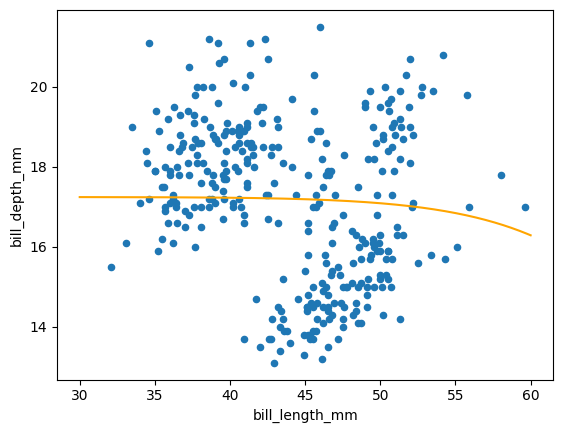

In [58]:
# plot 10 degree model
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(30, 60, num=1000)
X_new["bill_depth_10degree"] = X_new["bill_length_mm"] ** 10
y_new_cubic = pd.Series(
    ten_degree_model.predict(X_new[["bill_length_mm","bill_depth_10degree"]]),
    index=X_new["bill_length_mm"]
)

penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_cubic.plot.line(c = "orange");

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of the models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

1. The first plot of the linear regression is underfitting because it shows a straight line but there should be some curve in the data
2. The 10 degree plot is overfitting because bends and curves excessively to match the specific data set. It isn't capturing an overall pattern.
3. The best fit models would be the square and cubic models (plots 2 and 3) becasue they show some curvature that matches the data, but it isn't excessive. Thus, it doesn't overfit or underfit the data and shows a reasonable pattern.